# Data Wrangling with WeRateDogs

This reports details the wrangling of data derived from tweet from the WeRateDogs account as well as an exploration of that data. The data wrangling includes the wrangling of an archive of WeRateDogs tweet data, data obtained from an image prediction tool, as well as data obtained from the Twitter API. With this wrangled data, I explore the popularity and ratings of different dog breeds, and also explore a potential correlation between popularity and ratings. 

## Gathering the Data

In this section, I will cover the data gathering process of three data sources: 

1. WeRateDogs twitter archive (flat-file)
2. WeRateDogs image predictions (hosted flat-file)
3. WeRateDogs Twitter API data

###  1. Twitter Archive

Gathering the data for the provided flat-file just involves using Pandas to read the csv file into a dataframe.

In [1]:
import pandas as pd

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### 2. Image Predictions

The image prediction data is stored in a hosted tsv file. I will import the requests library in order to request and retrieve this file, and then read the tsv file into a dataframe.

In [3]:
import requests

In [4]:
predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predict_url)
with open('image_predictions.tsv', 'wb') as file:
          file.write(response.content)

In [5]:
df_predict = pd.read_csv("image_predictions.tsv", sep = '\t')
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3.  API data

I will access the Twitter API with Tweepy to obtain retweet and likes data. 

To begin, I'll import Tweepy, input credentials, and set Tweepy to wait on Twitter's API rate limit. 

In [6]:
import tweepy

consumer_key = 'removed'
consumer_secret = 'removed'
access_token = 'removed'
access_secret = 'removed'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Next, I'll send an API call for each tweet ID in the twitter archive, and write the successful API response contents to a text file later to be parsed. I will print out a success or failure message for each call, so that I may (1) track the progress of the API calls, and (2) ensure that failed API responses are due to deleted tweets and not network connection errors. 

In [7]:
import json

problem_tweets = [] #initializing dictionary to hold problem tweet ids and respective error messages

with open('tweet_json.txt','w') as json_text_file:
    for id_tweet in df_archive.tweet_id:
        try: 
            json.dump(api.get_status(id_tweet, tweet_mode='extended')._json,json_text_file) # get JSON object from Status object and dump to text file
            json_text_file.write('\n') # line break so following json text is on new line
            print("Tweet {} retreived and written".format(id_tweet)) # printing successes to indicate progress
        except Exception as e:
            problem_tweets.append(dict(id = id_tweet, exception = e))
            print("There is a problem with tweet {}".format(id_tweet))
            print(e)

Tweet 892420643555336193 retreived and written
Tweet 892177421306343426 retreived and written
Tweet 891815181378084864 retreived and written
Tweet 891689557279858688 retreived and written
Tweet 891327558926688256 retreived and written
Tweet 891087950875897856 retreived and written
Tweet 890971913173991426 retreived and written
Tweet 890729181411237888 retreived and written
Tweet 890609185150312448 retreived and written
Tweet 890240255349198849 retreived and written
Tweet 890006608113172480 retreived and written
Tweet 889880896479866881 retreived and written
Tweet 889665388333682689 retreived and written
Tweet 889638837579907072 retreived and written
Tweet 889531135344209921 retreived and written
Tweet 889278841981685760 retreived and written
Tweet 888917238123831296 retreived and written
Tweet 888804989199671297 retreived and written
Tweet 888554962724278272 retreived and written
There is a problem with tweet 888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}

Tweet 859924526012018688 retreived and written
Tweet 859851578198683649 retreived and written
Tweet 859607811541651456 retreived and written
Tweet 859196978902773760 retreived and written
Tweet 859074603037188101 retreived and written
Tweet 858860390427611136 retreived and written
Tweet 858843525470990336 retreived and written
Tweet 858471635011153920 retreived and written
Tweet 858107933456039936 retreived and written
Tweet 857989990357356544 retreived and written
Tweet 857746408056729600 retreived and written
Tweet 857393404942143489 retreived and written
Tweet 857263160327368704 retreived and written
Tweet 857214891891077121 retreived and written
Tweet 857062103051644929 retreived and written
Tweet 857029823797047296 retreived and written
Tweet 856602993587888130 retreived and written
Tweet 856543823941562368 retreived and written
Tweet 856526610513747968 retreived and written
Tweet 856330835276025856 retreived and written
Tweet 856288084350160898 retreived and written
Tweet 8562820

Tweet 832397543355072512 retreived and written
Tweet 832369877331693569 retreived and written
Tweet 832273440279240704 retreived and written
Tweet 832215909146226688 retreived and written
Tweet 832215726631055365 retreived and written
Tweet 832088576586297345 retreived and written
Tweet 832040443403784192 retreived and written
Tweet 832032802820481025 retreived and written
Tweet 831939777352105988 retreived and written
Tweet 831926988323639298 retreived and written
Tweet 831911600680497154 retreived and written
Tweet 831670449226514432 retreived and written
Tweet 831650051525054464 retreived and written
Tweet 831552930092285952 retreived and written
Tweet 831322785565769729 retreived and written
Tweet 831315979191906304 retreived and written
Tweet 831309418084069378 retreived and written
Tweet 831262627380748289 retreived and written
Tweet 830956169170665475 retreived and written
Tweet 830583320585068544 retreived and written
Tweet 830173239259324417 retreived and written
Tweet 8300974

Tweet 812466873996607488 retreived and written
Tweet 812372279581671427 retreived and written
Tweet 811985624773361665 retreived and written
Tweet 811744202451197953 retreived and written
Tweet 811647686436880384 retreived and written
Tweet 811627233043480576 retreived and written
Tweet 811386762094317568 retreived and written
Tweet 810984652412424192 retreived and written
Tweet 810896069567610880 retreived and written
Tweet 810657578271330305 retreived and written
Tweet 810284430598270976 retreived and written
Tweet 810254108431155201 retreived and written
Tweet 809920764300447744 retreived and written
Tweet 809808892968534016 retreived and written
Tweet 809448704142938112 retreived and written
Tweet 809220051211603969 retreived and written
Tweet 809084759137812480 retreived and written
Tweet 808838249661788160 retreived and written
Tweet 808733504066486276 retreived and written
Tweet 808501579447930884 retreived and written
Tweet 808344865868283904 retreived and written
Tweet 8081346

Tweet 788552643979468800 retreived and written
Tweet 788412144018661376 retreived and written
Tweet 788178268662984705 retreived and written
Tweet 788150585577050112 retreived and written
Tweet 788070120937619456 retreived and written
Tweet 788039637453406209 retreived and written
Tweet 787810552592695296 retreived and written
Tweet 787717603741622272 retreived and written
Tweet 787397959788929025 retreived and written
Tweet 787322443945877504 retreived and written
Tweet 787111942498508800 retreived and written
Tweet 786963064373534720 retreived and written
Tweet 786729988674449408 retreived and written
Tweet 786709082849828864 retreived and written
Tweet 786664955043049472 retreived and written
Tweet 786595970293370880 retreived and written
Tweet 786363235746385920 retreived and written
Tweet 786286427768250368 retreived and written
Tweet 786233965241827333 retreived and written
Tweet 786051337297522688 retreived and written
Tweet 786036967502913536 retreived and written
Tweet 7859278

Tweet 765222098633691136 retreived and written
Tweet 764857477905154048 retreived and written
Tweet 764259802650378240 retreived and written
Tweet 763956972077010945 retreived and written
Tweet 763837565564780549 retreived and written
Tweet 763183847194451968 retreived and written
Tweet 763167063695355904 retreived and written
Tweet 763103485927849985 retreived and written
Tweet 762699858130116608 retreived and written
Tweet 762471784394268675 retreived and written
Tweet 762464539388485633 retreived and written
Tweet 762316489655476224 retreived and written
Tweet 762035686371364864 retreived and written
Tweet 761976711479193600 retreived and written
Tweet 761750502866649088 retreived and written
Tweet 761745352076779520 retreived and written
Tweet 761672994376806400 retreived and written
Tweet 761599872357261312 retreived and written
Tweet 761371037149827077 retreived and written
Tweet 761334018830917632 retreived and written
Tweet 761292947749015552 retreived and written
Tweet 7612273

Rate limit reached. Sleeping for: 657


Tweet 758740312047005698 retreived and written
Tweet 758474966123810816 retreived and written
Tweet 758467244762497024 retreived and written
Tweet 758405701903519748 retreived and written
Tweet 758355060040593408 retreived and written
Tweet 758099635764359168 retreived and written
Tweet 758041019896193024 retreived and written
Tweet 757741869644341248 retreived and written
Tweet 757729163776290825 retreived and written
Tweet 757725642876129280 retreived and written
Tweet 757611664640446465 retreived and written
Tweet 757597904299253760 retreived and written
Tweet 757596066325864448 retreived and written
Tweet 757400162377592832 retreived and written
Tweet 757393109802180609 retreived and written
Tweet 757354760399941633 retreived and written
Tweet 756998049151549440 retreived and written
Tweet 756939218950160384 retreived and written
Tweet 756651752796094464 retreived and written
Tweet 756526248105566208 retreived and written
Tweet 756303284449767430 retreived and written
Tweet 7562885

Tweet 739932936087216128 retreived and written
Tweet 739844404073074688 retreived and written
Tweet 739623569819336705 retreived and written
Tweet 739606147276148736 retreived and written
Tweet 739544079319588864 retreived and written
Tweet 739485634323156992 retreived and written
Tweet 739238157791694849 retreived and written
Tweet 738891149612572673 retreived and written
Tweet 738885046782832640 retreived and written
Tweet 738883359779196928 retreived and written
Tweet 738537504001953792 retreived and written
Tweet 738402415918125056 retreived and written
Tweet 738184450748633089 retreived and written
Tweet 738166403467907072 retreived and written
Tweet 738156290900254721 retreived and written
Tweet 737826014890496000 retreived and written
Tweet 737800304142471168 retreived and written
Tweet 737678689543020544 retreived and written
Tweet 737445876994609152 retreived and written
Tweet 737322739594330112 retreived and written
Tweet 737310737551491075 retreived and written
Tweet 7367361

Tweet 711363825979756544 retreived and written
Tweet 711306686208872448 retreived and written
Tweet 711008018775851008 retreived and written
Tweet 710997087345876993 retreived and written
Tweet 710844581445812225 retreived and written
Tweet 710833117892898816 retreived and written
Tweet 710658690886586372 retreived and written
Tweet 710609963652087808 retreived and written
Tweet 710588934686908417 retreived and written
Tweet 710296729921429505 retreived and written
Tweet 710283270106132480 retreived and written
Tweet 710272297844797440 retreived and written
Tweet 710269109699739648 retreived and written
Tweet 710153181850935296 retreived and written
Tweet 710140971284037632 retreived and written
Tweet 710117014656950272 retreived and written
Tweet 709918798883774466 retreived and written
Tweet 709901256215666688 retreived and written
Tweet 709852847387627521 retreived and written
Tweet 709566166965075968 retreived and written
Tweet 709556954897764353 retreived and written
Tweet 7095192

Tweet 697995514407682048 retreived and written
Tweet 697990423684476929 retreived and written
Tweet 697943111201378304 retreived and written
Tweet 697881462549430272 retreived and written
Tweet 697630435728322560 retreived and written
Tweet 697616773278015490 retreived and written
Tweet 697596423848730625 retreived and written
Tweet 697575480820686848 retreived and written
Tweet 697516214579523584 retreived and written
Tweet 697482927769255936 retreived and written
Tweet 697463031882764288 retreived and written
Tweet 697270446429966336 retreived and written
Tweet 697259378236399616 retreived and written
Tweet 697255105972801536 retreived and written
Tweet 697242256848379904 retreived and written
Tweet 696900204696625153 retreived and written
Tweet 696894894812565505 retreived and written
Tweet 696886256886657024 retreived and written
Tweet 696877980375769088 retreived and written
Tweet 696754882863349760 retreived and written
Tweet 696744641916489729 retreived and written
Tweet 6967138

Tweet 686035780142297088 retreived and written
Tweet 686034024800862208 retreived and written
Tweet 686007916130873345 retreived and written
Tweet 686003207160610816 retreived and written
Tweet 685973236358713344 retreived and written
Tweet 685943807276412928 retreived and written
Tweet 685906723014619143 retreived and written
Tweet 685681090388975616 retreived and written
Tweet 685667379192414208 retreived and written
Tweet 685663452032069632 retreived and written
Tweet 685641971164143616 retreived and written
Tweet 685547936038666240 retreived and written
Tweet 685532292383666176 retreived and written
Tweet 685325112850124800 retreived and written
Tweet 685321586178670592 retreived and written
Tweet 685315239903100929 retreived and written
Tweet 685307451701334016 retreived and written
Tweet 685268753634967552 retreived and written
Tweet 685198997565345792 retreived and written
Tweet 685169283572338688 retreived and written
Tweet 684969860808454144 retreived and written
Tweet 6849597

Tweet 678334497360859136 retreived and written
Tweet 678278586130948096 retreived and written
Tweet 678255464182861824 retreived and written
Tweet 678023323247357953 retreived and written
Tweet 678021115718029313 retreived and written
Tweet 677961670166224897 retreived and written
Tweet 677918531514703872 retreived and written
Tweet 677895101218201600 retreived and written
Tweet 677716515794329600 retreived and written
Tweet 677700003327029250 retreived and written
Tweet 677698403548192770 retreived and written
Tweet 677687604918272002 retreived and written
Tweet 677673981332312066 retreived and written
Tweet 677662372920729601 retreived and written
Tweet 677644091929329666 retreived and written
Tweet 677573743309385728 retreived and written
Tweet 677565715327688705 retreived and written
Tweet 677557565589463040 retreived and written
Tweet 677547928504967168 retreived and written
Tweet 677530072887205888 retreived and written
Tweet 677335745548390400 retreived and written
Tweet 6773346

Rate limit reached. Sleeping for: 649


Tweet 676975532580409345 retreived and written
Tweet 676957860086095872 retreived and written
Tweet 676949632774234114 retreived and written
Tweet 676948236477857792 retreived and written
Tweet 676946864479084545 retreived and written
Tweet 676942428000112642 retreived and written
Tweet 676936541936185344 retreived and written
Tweet 676916996760600576 retreived and written
Tweet 676897532954456065 retreived and written
Tweet 676864501615042560 retreived and written
Tweet 676821958043033607 retreived and written
Tweet 676819651066732545 retreived and written
Tweet 676811746707918848 retreived and written
Tweet 676776431406465024 retreived and written
Tweet 676617503762681856 retreived and written
Tweet 676613908052996102 retreived and written
Tweet 676606785097199616 retreived and written
Tweet 676603393314578432 retreived and written
Tweet 676593408224403456 retreived and written
Tweet 676590572941893632 retreived and written
Tweet 676588346097852417 retreived and written
Tweet 6765829

Tweet 672997845381865473 retreived and written
Tweet 672995267319328768 retreived and written
Tweet 672988786805112832 retreived and written
Tweet 672984142909456390 retreived and written
Tweet 672980819271634944 retreived and written
Tweet 672975131468300288 retreived and written
Tweet 672970152493887488 retreived and written
Tweet 672968025906282496 retreived and written
Tweet 672964561327235073 retreived and written
Tweet 672902681409806336 retreived and written
Tweet 672898206762672129 retreived and written
Tweet 672884426393653248 retreived and written
Tweet 672877615439593473 retreived and written
Tweet 672834301050937345 retreived and written
Tweet 672828477930868736 retreived and written
Tweet 672640509974827008 retreived and written
Tweet 672622327801233409 retreived and written
Tweet 672614745925664768 retreived and written
Tweet 672609152938721280 retreived and written
Tweet 672604026190569472 retreived and written
Tweet 672594978741354496 retreived and written
Tweet 6725917

Tweet 669683899023405056 retreived and written
Tweet 669682095984410625 retreived and written
Tweet 669680153564442624 retreived and written
Tweet 669661792646373376 retreived and written
Tweet 669625907762618368 retreived and written
Tweet 669603084620980224 retreived and written
Tweet 669597912108789760 retreived and written
Tweet 669583744538451968 retreived and written
Tweet 669573570759163904 retreived and written
Tweet 669571471778410496 retreived and written
Tweet 669567591774625800 retreived and written
Tweet 669564461267722241 retreived and written
Tweet 669393256313184256 retreived and written
Tweet 669375718304980992 retreived and written
Tweet 669371483794317312 retreived and written
Tweet 669367896104181761 retreived and written
Tweet 669363888236994561 retreived and written
Tweet 669359674819481600 retreived and written
Tweet 669354382627049472 retreived and written
Tweet 669353438988365824 retreived and written
Tweet 669351434509529089 retreived and written
Tweet 6693285

Tweet 666418789513326592 retreived and written
Tweet 666411507551481857 retreived and written
Tweet 666407126856765440 retreived and written
Tweet 666396247373291520 retreived and written
Tweet 666373753744588802 retreived and written
Tweet 666362758909284353 retreived and written
Tweet 666353288456101888 retreived and written
Tweet 666345417576210432 retreived and written
Tweet 666337882303524864 retreived and written
Tweet 666293911632134144 retreived and written
Tweet 666287406224695296 retreived and written
Tweet 666273097616637952 retreived and written
Tweet 666268910803644416 retreived and written
Tweet 666104133288665088 retreived and written
Tweet 666102155909144576 retreived and written
Tweet 666099513787052032 retreived and written
Tweet 666094000022159362 retreived and written
Tweet 666082916733198337 retreived and written
Tweet 666073100786774016 retreived and written
Tweet 666071193221509120 retreived and written
Tweet 666063827256086533 retreived and written
Tweet 6660586

In [8]:
df_api_problem_tweets = pd.DataFrame.from_dict(problem_tweets)
df_api_problem_tweets = df_api_problem_tweets[['id','exception']]
df_api_problem_tweets

,id,exception
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
2,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
3,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
4,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
5,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
6,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
7,845459076796616705,"[{'code': 144, 'message': 'No status found wit..."
8,842892208864923648,"[{'code': 144, 'message': 'No status found wit..."
9,837012587749474308,"[{'code': 144, 'message': 'No status found wit..."


It does appear that the only errors are due to missing IDs, which can happen with tweets that have been deleted. So I do think I got all the tweet data available.

I will now parse the JSON lines in the newly created text file for the retweet and likes ("favorites"), and write the data to a dataframe. 

In [9]:
tweet_attributes = ['id', 'retweet_count', 'favorite_count']
tweet_dict = []

with open('tweet_json.txt', 'r') as json_text_file: 
    json_string_list = json_text_file.readlines()

for json_string in json_string_list:
    json_full_dict = json.loads(json_string)
    tweet_dict.append(dict((attribute,json_full_dict[attribute]) for attribute in tweet_attributes))

df_api = pd.DataFrame.from_dict(tweet_dict)
column_order = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[column_order]
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8228,37762
1,892177421306343426,6079,32441
2,891815181378084864,4023,24432
3,891689557279858688,8380,41096
4,891327558926688256,9083,39297
5,891087950875897856,3012,19766
6,890971913173991426,1991,11551
7,890729181411237888,18281,63706
8,890609185150312448,4137,27149
9,890240255349198849,7149,31139


It does appear the API data has successfully been written to a dataframe.

## Assessing the Data

I will now assess the gathered data for dirtiness and tidiness issues. Most of the assessment concerns the archive, as the image predictions and API dataframe do appear to be relatively clean and tidy.

###  1. Twitter Archive

To begin, I will preview the dataframe and run infO() on the table and review the shape of the table and its columns.

In [10]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I have the following thoughts just from previewing the table and reviewing the column info:

* column names are generally self-descriptive
* there are multiple columns concerning replies and retweets; I don't think these are necessary
* there are multiple columns containing less than 2356 values, potentially indicating missing data 

Now, I'll basically assess each column from left to right.

With **tweet_id**, I want to check that the id's are unique. 

In [12]:
df_archive.tweet_id.nunique()

2356

There indeed appears to be a unique ID for each row in the table. 

As mentioned before, I don't think the reply columns will be necessary, as this project concerns wrangling and exploring original ratings. Therefore in the cleaning stage of the wrangling, I think I will use the reply and retweet columns to filter out the replies and retweets, and then remove these columns from the table. 

For the **timestamp** column, *if* I were to use this column for the exploration, I would like to make sure that this column is formatted as a datetime column, rather than strings. 

I will check the object type of the values in this column. 

In [13]:
type(df_archive.timestamp[0])

str

The timestamps are currently formatted as strings, so I will need to consider addressing the type in the cleaning stage of the analysis. 

Next, I will review the **source** column.

In [14]:
df_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [15]:
df_archive.source.value_counts(0)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
for i in df_archive[df_archive.source.str.contains("Vine")].text:
    print(i)

This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM
This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O
Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3
This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H
This is Arnie. He's afraid of his own bark. 12/10 would comfort https://t.co/ObT2tSxXit
This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ
This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC
This is Combo. The daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/LOKrNo0OM7
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy  https://t.co/dVm5Hgdpeb
This is M

It appears the **source** columns indicates whether the tweet was posted using the iPhone Twitter application, TweetDeck, the Twitter web client, or Vine. Given that Vines are short videos, perhaps there won't be image predictions for these tweets, but these tweets do appear to have valid ratings, so I don't see any issues concerning cleanliness or tidiness.

I will check the **text** columns for uniqueness. 

In [17]:
df_archive.text.nunique()

2356

The **text** column does indeed have unique values. From previewing the entire table, and from reviewing the text contents from reviewing the Vine tweets, I do not see any problems with cleaniness or tidiness.

Moving on, like with the reply columns, I do think that the retweets columns will be irrelevant after removing retweets from the table.

I will assess the **expanded_urls** column. This column does have some empty rows, so I will review these empty rows to see if there appear to be cleanliness issues overall with the rows. 

In [18]:
df_archive.expanded_urls.nunique()

2218

Not only are some urls missing, but some are duplicates. I will inspect the duplicates.

In [19]:
df_archive[df_archive.expanded_urls.notnull() & df_archive.expanded_urls.duplicated(False)].sort_values(by = ['expanded_urls'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None


It appears the duplicated urls are from retweets, which will probably be removed later on. 

I will check the tweets missing urls.

In [20]:
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


It seems that most of these are replies or retweets. I will check if there are any original tweets missing urls. 

In [21]:
df_archive[df_archive.in_reply_to_status_id.isnull() 
           & df_archive.retweeted_status_id.isnull() 
           & df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [22]:
for i in df_archive[df_archive.in_reply_to_status_id.isnull() 
           & df_archive.retweeted_status_id.isnull() 
           & df_archive.expanded_urls.isnull()].text:
    print(i)

Beebop and Doobert should start a band 12/10 would listen
Today, 10/10, should be National Dog Rates Day
Oh my god 10/10 for every little hot dog pupper


So there are three original tweets with missing URLs. The tweets and ratings seem valid, and I don't think the URL is an essential piece of data for the tweets. So at the moment, I'm not convinced that these rows should be dropped. 

Next, I will review the ratings fields. Given both are float columns, I will compute descriptive statistics to inspect for dirty data. 

In [23]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The zero minimums for the numerators and denominators are concerning. I will filter for zero values and review.

In [24]:
df_archive[(df_archive.rating_numerator == 0) | (df_archive.rating_denominator == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [25]:
for i in df_archive[(df_archive.rating_numerator == 0) | (df_archive.rating_denominator == 0)].text:
    print(i)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


Three tweets are returned, and the first and third tweets are replies, which will be removed. The second tweet is not a typical rating, but WeRateDogs accusing another Twitter account of plagiarism, and awarding the plagiarizing tweet a rating of "0/10". If the scope of this project strictly concerns dog ratings, perhaps this can be considered an invalid row and should be dropped.

Next, I will review the **name** column, mainly checking the values do appear to be names. 

In [26]:
df_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Daisy             7
an                7
Toby              7
Bailey            7
Rusty             6
Oscar             6
Jax               6
Koda              6
Jack              6
Leo               6
Milo              6
Bella             6
Stanley           6
Scout             6
Dave              6
very              5
               ... 
Alexanderson      1
Ralphson          1
Bobbay            1
Leonidas          1
Dido              1
Geoff             1
unacceptable      1
Pepper            1
Jaycob            1
Franq             1
life              1
Halo              1
Sobe              1
Leonard           1
Jebberson         1
Obie              1
Jay               1
Stu               1
Lillie            1


By simply running the value_counts() function, I can spot some invalid values, such as "a", "the, and "an". As all the capitalized values do appears to be valid, I will filter and inspect uncapitalized values.  

In [27]:
df_archive[df_archive.name.str.islower()].name.values

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a',
       'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'],
      dtype=object)

Yes, none of these appear to be names. So there is a data cleanliness issue with the **name** column. 

I will now assess the **doggo**, **floofer**, **pupper**, and **puppo** columns. I will assess them together, as from the table preview earlier, it appears that each of these columns should be binary. Additionally, regarding the tidiness of the columns, perhaps these columns should be collapsed into a single "dog term of endearment" column. 

In [28]:
df_archive.loc[:,'doggo':].nunique()

doggo      2
floofer    2
pupper     2
puppo      2
dtype: int64

So, the columns are binary (e.g. either "None" or "doggo"). Given that they're binary, perhaps they should be converted to dummy variables (e.g. "0" or "1") so they are ready for exploration. 

Given, that they "seem" to be all values of a categorical variable, I will check if these terms appear to be mutually exclusive. If they do appear to be mutually exclusive, then I would consider collapsing the columns. 

In [29]:
df_archive[sum([df_archive.doggo != "None", 
                df_archive.floofer != "None", 
                df_archive.pupper != "None", 
                df_archive.puppo != "None"]) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


So, there are rows with multiple terms, thus the terms are not mutually exclusive. I don't think it makes to have multiple entries in a single cell, so I do not think there is a tidiness issue here. 

To recap, here is a column-by-column summary of my assessment: 

* **tweet_id**: good
* **in_reply_to_status_id**: cleanliness and tidiness issue; replies might not include original ratings, which is the purpose of the table and this project
* **in_reply_to_user_id**: cleanliness and tidiness issue; replies might not include original ratings, which is the purpose of the table and this project
* **timestamp**: cleanliness issue; timestamps are in string format instead of datetime format
* **source**: good
* **text**: good
* **retweeted_status_id**: cleanliness and tidiness issue; retweets might not include original ratings, which is the purpose of the table and this project
* **retweeted_status_user_id**: cleanliness and tidiness issue; retweets might not include original ratings, which is the purpose of the table and this project
* **retweeted_status_timestamp**: cleanliness and tidiness issue; retweets might not include original ratings, which is the purpose of the table and this project
* **rating_numerator**: cleanliness issue; outlier 0 minimum is associated with invalid rating
* **rating_denominator**: cleanliness issue; outlier 0 mininums are associated with invalid ratings
* **name**: cleanliness issue; some names values are not actually names 
* **doggo**: cleanliness issue; should be dummy variable (values of 0 or 1)
* **floofer**: cleanliness issue; should be dummy variable (values of 0 or 1)
* **pupper**: cleanliness issue; should be dummy variable (values of 0 or 1)
* **puppo**: cleanliness issue; should be dummy variable (values of 0 or 1)

### 2. Image Predictions

Assess the image predictions dataframe.

In [30]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df_predict.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [33]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


This dataframe looks clean and tidy, yet if the purpose of the table is to *only* hold dog rating images, then perhaps the non-dog rows should be removed. Additionally, if non-dog rows are to be removed, a decision needs to be made concerning the determinants for a dog or non-dog, e.g. perhaps **p1_dog** should be true for confidence in that row holds the a dog image. In that scenario, if we filter based on **p1_dog**, then the p2 and p3 columns would be unneccessary. 

### Twitter API Dataframe

Assess the API-derived dataframe.

In [34]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8228,37762
1,892177421306343426,6079,32441
2,891815181378084864,4023,24432
3,891689557279858688,8380,41096
4,891327558926688256,9083,39297
5,891087950875897856,3012,19766
6,890971913173991426,1991,11551
7,890729181411237888,18281,63706
8,890609185150312448,4137,27149
9,890240255349198849,7149,31139


In [35]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [36]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2900.852501,7895.681915
std,6.828729e+16,4891.560572,12238.175022
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,583.000000,1368.000000
50%,7.186133e+17,1353.000000,3436.000000
75%,7.986907e+17,3380.500000,9673.000000
max,8.924206e+17,82912.000000,163042.000000


The **id** is insconsistent with the **tweet_id** names for other tables. Otherwise, the values seem reasonable.

### Assessment Summary

Overall, most of the tidiness and cleanliness issues lie in the archive dataframe. If the purpose of the table is hold the WeRateDogs ratings and other WeRateDogs fields, then the fields concerning replies and retweets probably aren't necessary. Additionally, there do seem to invalid and/or missing values in the rows. 

Additionally, while the image prediction table itself is tidy, for the scope of this project (the exploration of original *dog* ratings), the data in the table does seem to reflect that not all the ratings are of dogs. In that case, the table or set of tables to be used for this project should be filtered just for dog ratings. 

As for the general tidiness amongst the tables, I think for a tidy database that would need to be maintained for use after this particular project, it does make sense to keep these table separate, given they each serve a unique purpose and were probably derived from tools and/or sources: the archive with the WeRateDogs fields were probably derived from a textual analysis tool; the image prediction table from a image analysis tool; and the tweet data directly from the API. 

## Cleaning the Data

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

The data cleaning mostly involves the cleaning of the archive dataframe to remove retweets and replies, as well as some cleaning of the image predictions tables so that only images of dogs are included. 

### Cleaning the Archive DataFrame

To begin, I will prepare to remove columns irrelevant to a table holding original WeRateDogs ratings. The fields in question involve the tweets being replies and retweets. While I will remove these columns, I do want to use them to identify which rows are actually replies and retweets, remove those rows, and then remove the columns. 

In [37]:
df_archive_clean = df_archive.copy()
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [38]:
# filtering the archive for rows that either have the reply status id or retweet id populated
df_archive_clean[df_archive_clean[['in_reply_to_status_id', 'retweeted_status_id']].notnull().any(axis=1) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [39]:
# dropping the retweets and replies
retweets_replies = df_archive_clean[df_archive_clean[['in_reply_to_status_id', 'retweeted_status_id']].notnull().any(axis=1) == True].index
df_archive_clean.drop(retweets_replies, inplace = True)
# confirming that replies and retweets are removed
df_archive_clean[df_archive_clean[['in_reply_to_status_id', 'retweeted_status_id']].notnull().any(axis=1) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


I will now drop all irrelevant columns, which are the reply and retweet columns.

In [40]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [41]:
archive_columns_todrop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                          'retweeted_status_id', 'retweeted_status_user_id',
                          'retweeted_status_timestamp']
df_archive_clean.drop(columns = archive_columns_todrop, inplace = True)
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


As noted in the assessment, the **timestamp** column is currently formatted as strings. To prepare this column for analysis, I will seek to cast this column as datetime objects. 

In [42]:
# converting string column to timestamp
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
# confirming type
type(df_archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In the assessment, simply reviewing the minimum revealed an invalid rating. While zero value is a red flag, I will inspect more ratings less than a 10/10, given WeRateDogs usually rates above 10/10. 

In [43]:
df_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2097.000000,2097.000000
mean,12.189318,10.448736
std,40.364996,6.645061
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [44]:
df_archive_clean[(df_archive_clean.rating_numerator < 10) | (df_archive_clean.rating_numerator < 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
730,781661882474196992,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
814,771014301343748096,2016-08-31 15:58:28,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
835,768193404517830656,2016-08-23 21:09:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
845,766423258543644672,2016-08-18 23:55:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
859,763183847194451968,2016-08-10 01:23:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


More rows were outputted here than I expected. I will check a few of the tweets.

In [45]:
bad_numerators = df_archive_clean[df_archive_clean.rating_numerator < 10].index
# printing to get entire string output
for tweet in bad_numerators:
    print(df_archive_clean.text[tweet])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd
Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq
This is Shadoe. Her tongue flies out of h

In [46]:
bad_denominators = df_archive_clean[df_archive_clean.rating_denominator < 10].index
# printing to get entire string output
for tweet in bad_denominators:
    print('{} '.format(tweet) + df_archive_clean.text[tweet])

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


After perusing these outputs, it seems that the only additional "bad" row concerning the rating numerator is the first row listed (index number 45). The actual tweet has a rating of "13.5/10" while the rating in the set is "5/10". I'm guessing whatever algorithm was used to extract the rating didn't account for decimals. 

For denominators, there are only two tweets with ratings less than 10, and both of them are invalid. The first tweet included the phrase "24/7", which was mistaken for a rating. The second tweet includes "1/2" to denote half of a leg, which was mistaken for a rating. 

I will drop these four rows.

In [47]:
df_archive_clean.drop([45, 315, 516, 2335], inplace = True)

In [48]:
df_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2093.000000,2093.000000
mean,12.198280,10.454849
std,40.400816,6.648401
min,1.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Now that the minimum values have been inspected and addressed. I will inspect the maximum values.

In [49]:
df_archive_clean.sort_values(by = ['rating_numerator'], ascending = False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1843,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [50]:
df_archive_clean.sort_values(by = ['rating_denominator'], ascending = False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1843,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


I am suspect of any rating numerator greater than 14 or any denominator greater than 10. I will filter based on these conditions and inspect these tweets.

In [51]:
df_archive_clean[(df_archive_clean.rating_numerator > 14) | (df_archive_clean.rating_denominator > 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [52]:
suspect_ratings = df_archive_clean[(df_archive_clean.rating_numerator > 14) | (df_archive_clean.rating_denominator > 10)].index
for tweet in suspect_ratings:
    print('{} '.format(tweet) + df_archive_clean.text[tweet])

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
695 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
979 This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed

After reviewing, it does seem that many of the denominators not equal to 10 are due to the denominator being multipled by the number of dogs in the tweet. Then there are joke ratings of 1776 and 420. Otherwise, there appear to invalid ratings due to decimals for phrases (e.g. "7/11") being in the rating format. 

I will drop the bad rows I found.

In [53]:
df_archive_clean.drop([695, 763, 1165, 1202, 1662, 1712], inplace = True)
df_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2087.000000,2087.000000
mean,12.142789,10.431720
std,40.424008,6.598034
min,1.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


I am happy with ratings after the visual inspection of values. If there were a greater amount of problem rows with decimals, I might've considered extracting the ratings from the text fields myself, accounting for the decimals and perhaps just dropping and tweets with multiple strings in a rating format. 

I will now inspect the names. As noted in the assessment, there are problem values in the names, particularly the lowercase values.

I see a few problem values, including "a", "an", "incredibly", and "mad." Perhaps a good filter would be filter for any uncapitalized names. 

In [54]:
df_archive_clean[df_archive_clean.name.str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [55]:
df_archive_clean[df_archive_clean.name.str.islower()].name.value_counts()

a               55
the              8
an               5
very             4
one              4
quite            3
just             3
getting          2
actually         2
not              2
unacceptable     1
his              1
by               1
infuriating      1
mad              1
life             1
officially       1
light            1
my               1
space            1
this             1
old              1
incredibly       1
all              1
such             1
Name: name, dtype: int64

It seems that the name field is just the word following "is". I will replace the name value for these rows with "None". 

In [56]:
bad_names = df_archive_clean[df_archive_clean.name.str.islower()].name.unique()
df_archive_clean.replace(to_replace = bad_names, value = "None", inplace = True)
df_archive_clean.name.value_counts()

None          703
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Lola            8
Sadie           8
Winston         8
Toby            7
Daisy           7
Bailey          6
Jax             6
Bo              6
Oscar           6
Stanley         6
Koda            6
Bentley         5
Leo             5
Milo            5
Chester         5
Bella           5
Louis           5
Rusty           5
Dave            5
Scout           5
Buddy           5
Larry           4
Maggie          4
             ... 
Tebow           1
Anakin          1
Samsom          1
Joshwa          1
Brandonald      1
Strider         1
Holly           1
Crouton         1
Farfle          1
Ralf            1
Rontu           1
Ziva            1
Vinnie          1
Tobi            1
Nollie          1
Crumpet         1
Venti           1
Dallas          1
Scruffers       1
Jameson         1
Stubert         1
Vixen           1
Dawn            1
Cedrick         1
Sandra    

In [57]:
df_archive_clean[df_archive_clean.name.str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
df_archive_clean.name.value_counts()

None          703
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Lola            8
Sadie           8
Winston         8
Toby            7
Daisy           7
Bailey          6
Jax             6
Bo              6
Oscar           6
Stanley         6
Koda            6
Bentley         5
Leo             5
Milo            5
Chester         5
Bella           5
Louis           5
Rusty           5
Dave            5
Scout           5
Buddy           5
Larry           4
Maggie          4
             ... 
Tebow           1
Anakin          1
Samsom          1
Joshwa          1
Brandonald      1
Strider         1
Holly           1
Crouton         1
Farfle          1
Ralf            1
Rontu           1
Ziva            1
Vinnie          1
Tobi            1
Nollie          1
Crumpet         1
Venti           1
Dallas          1
Scruffers       1
Jameson         1
Stubert         1
Vixen           1
Dawn            1
Cedrick         1
Sandra    

I think converting uncapitalized names to "None" did a good enough job of filtering out bad names. 

I will now address the final four columns. I will convert the columns to dummy variables so they are ready for quantitative analysis.

In [59]:
dummy_columns = ['doggo', 'floofer', 'pupper', 'puppo']
dummies_table = pd.get_dummies(df_archive_clean[dummy_columns])
df_archive_clean[dummy_columns] = dummies_table[['doggo_doggo', 'floofer_floofer', 'pupper_pupper', 'puppo_puppo']]
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,0,0,0,0
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,0,0,0,0
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,0,0,0,0
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1,0,0,0


The archive dataframe now appears clean.

### Cleaning the Image Predictions DataFrame

I will now clean the image prediction dataframe. Given that each of the images should include a dog, I will use the **p1_dog** column to filter out any non-dog classifications. 

In [60]:
df_predict[df_predict.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [61]:
df_predict_clean = df_predict.copy()
not_dogs_rows = df_predict_clean[df_predict_clean.p1_dog == False].index
df_predict_clean.drop(not_dogs_rows, inplace = True)

In [62]:
df_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Given that I've filtered based on the **p1_dog**, I will drop all columns, except for **tweet_id**, **jpg_url**, and **p1**. I will also rename **p1** to *breed*. 

In [63]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [64]:
predict_columnstodrop = ['img_num', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'];
df_predict_clean.drop(columns = predict_columnstodrop, inplace = True);
df_predict_clean.head()

,tweet_id,jpg_url,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [65]:
df_predict_clean.rename(columns = {"p1" : "breed"}, inplace = True)
df_predict_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


The image predictions dataframe now looks clean.

### Cleaning the API DataFrame

This table is basically clean already. Given that the tweet ID will act the primary key amongst the tables, I will rename the **id** column for consistency.

In [66]:
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8228,37762
1,892177421306343426,6079,32441
2,891815181378084864,4023,24432
3,891689557279858688,8380,41096
4,891327558926688256,9083,39297


In [67]:
df_api.rename(columns = {"id" : "tweet_id"}, inplace = True)
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8228,37762
1,892177421306343426,6079,32441
2,891815181378084864,4023,24432
3,891689557279858688,8380,41096
4,891327558926688256,9083,39297


### Joining the DataFrames

All the dataframes seem clean enough for analysis. 

As for tidiness, given each table serves a unique purpose, they should be kept separate if they were to be maintained after this project. For the scope of this project, where we're seeking to produce insights relating to the actual and original dog ratings, a completely tidy set of dataframes might hinder the analysis. 

Given that both the archive and API dataframes hold variables of interest, and that the image predictions dataframe allowed the removal of non-dog ratings, an inner join of each of tables would help produce a set of valid of observations along with every potential variable of interest. 

In [68]:
df_master = df_archive_clean.merge(df_predict_clean.merge(df_api, on = 'tweet_id'), on = 'tweet_id')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6079,32441
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4023,24432
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9083,39297
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,0,0,0,0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3012,19766
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1991,11551


The master table appears ready for storing and for exploration.

## Storing and Exploring the Wrangled Data

Now that the data has been cleaned and joined into a master dataframe, I will store the master table to a csv file. 

In [69]:
df_master.to_csv("twitter_archive_master.csv")

The exploration of the dataframe will mainly involve an analysis of the different breeds and exploring correlations in the dataframe. 

### Exploring the Breeds

To begin the exploration, I would to know which breeds are the most popular. I will plot a horizontal bar chart with the sorted values of tweets amongst the breeds.

In [70]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

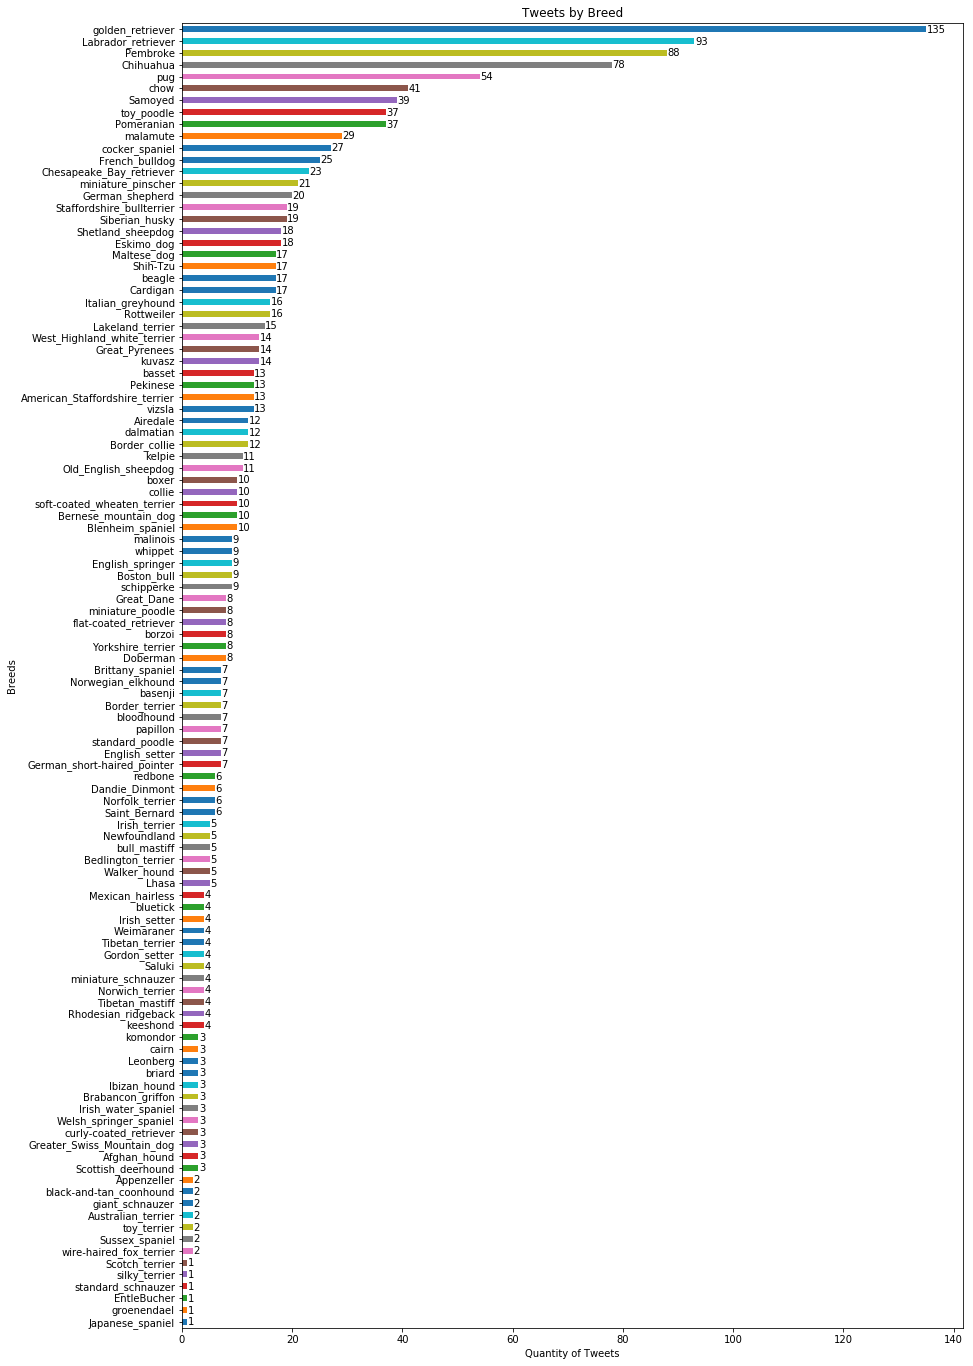

In [71]:
dog_breed_counts = df_master.breed.value_counts(ascending = True)
ax = dog_breed_counts.plot.barh(figsize = (14, 24));
for breed, count in enumerate(dog_breed_counts):
    ax.annotate(count,(count + 0.1, breed - 0.3))
ax.set_title('Tweets by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Quantity of Tweets');

Perhap unsurpisingly, the Golden Retriever is the most popular breed amongst WeRateDogs tweets. I would guess that this list reflects the popularity of dog breeds in general. 

While this is arguably uninteresting result, perhaps some breeds are favorited more, retweeted more, or even rated higher than others. 

Similary to the tweet quantities, I will chart the mean likes and retweets by breed. This time, I will only plot breeds with more than 5 tweets. 

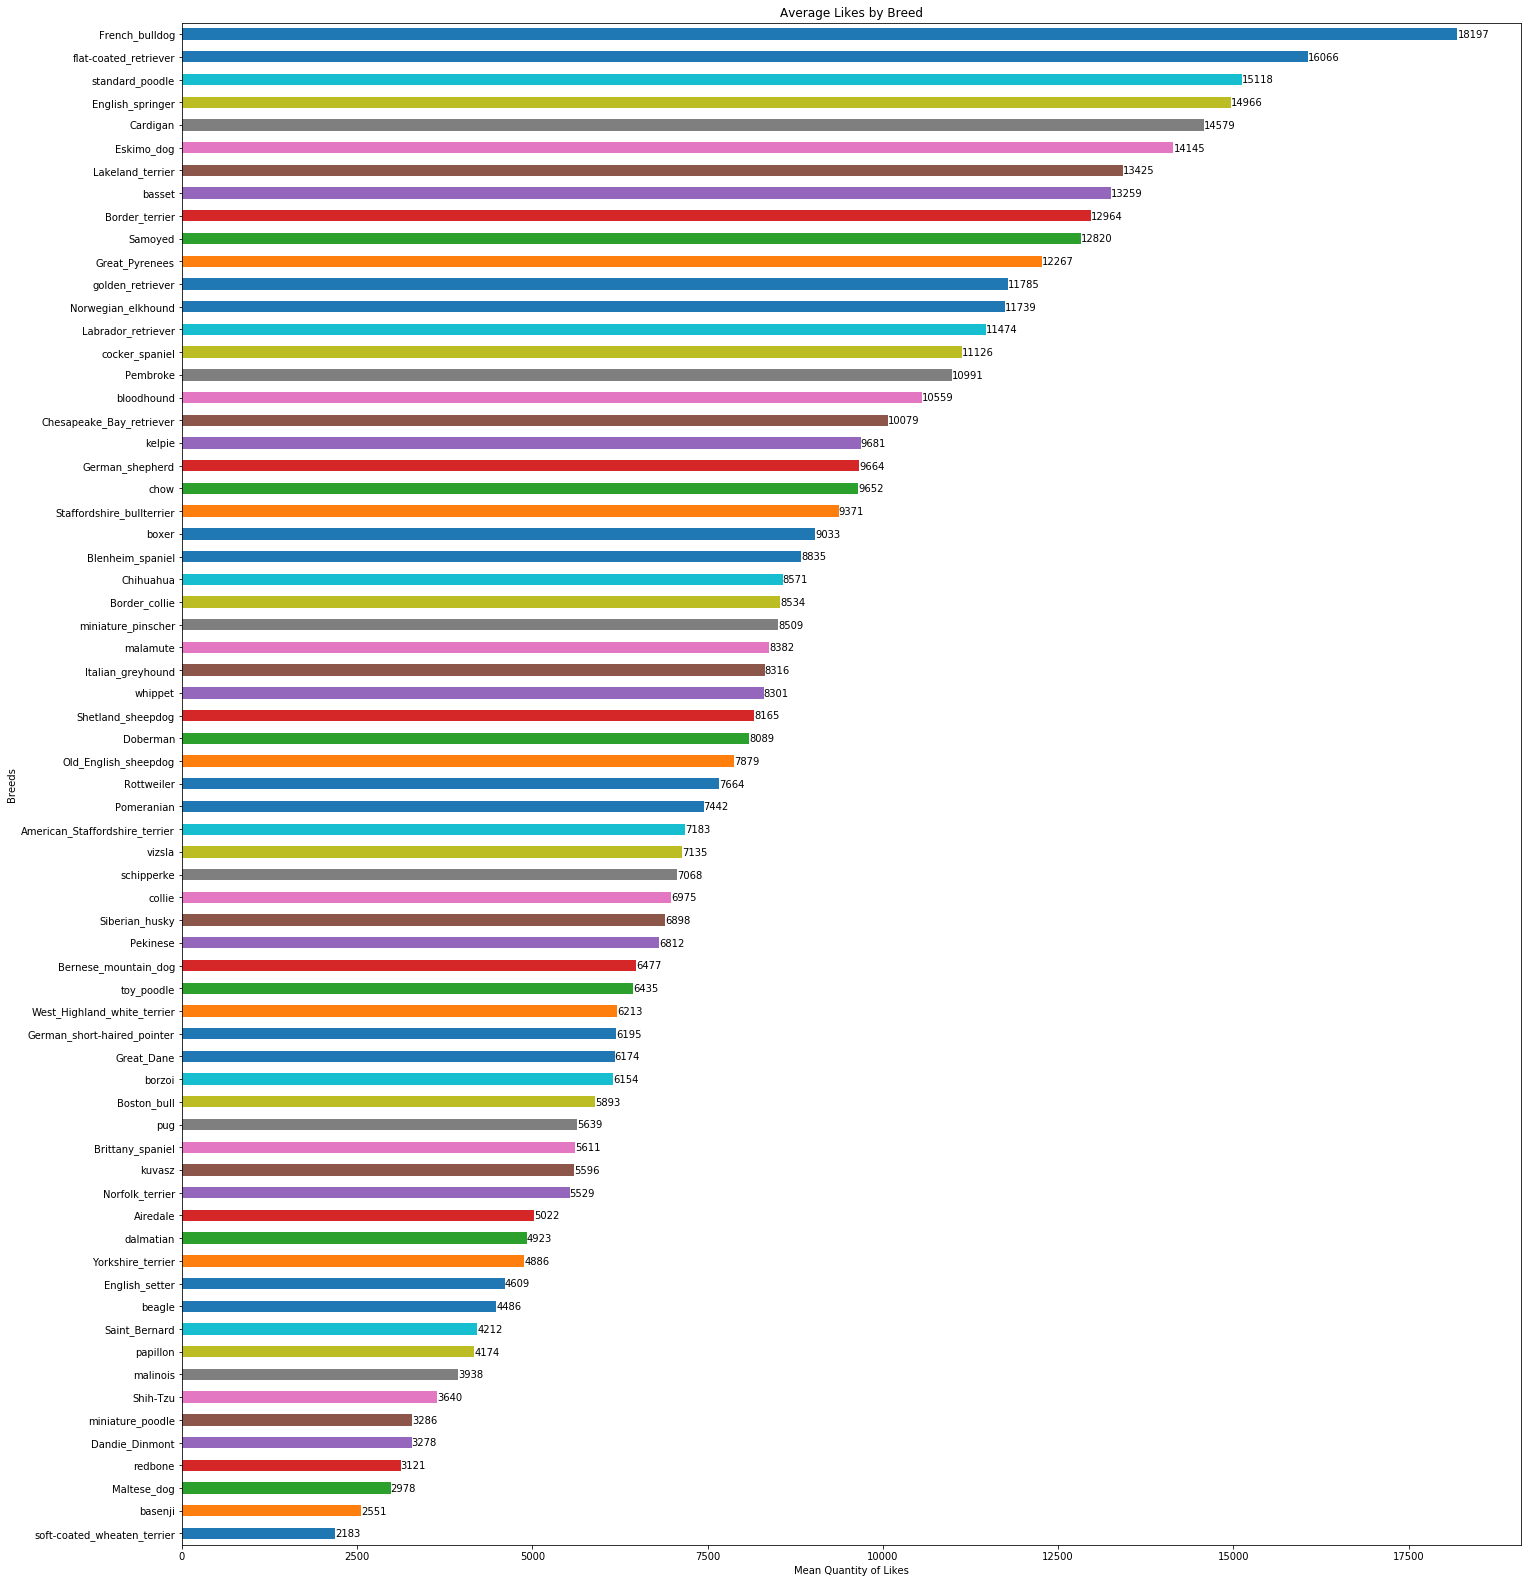

In [72]:
breed_counts = df_master.breed.value_counts()
breed_counts_morethan5 = breed_counts[breed_counts > 5]
breed_likes_threshold = df_master.groupby(['breed']).favorite_count.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_likes_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_likes_threshold):
    ax.annotate(round(count),(count + 0.01, breed - 0.15))
ax.set_title('Average Likes by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Likes');

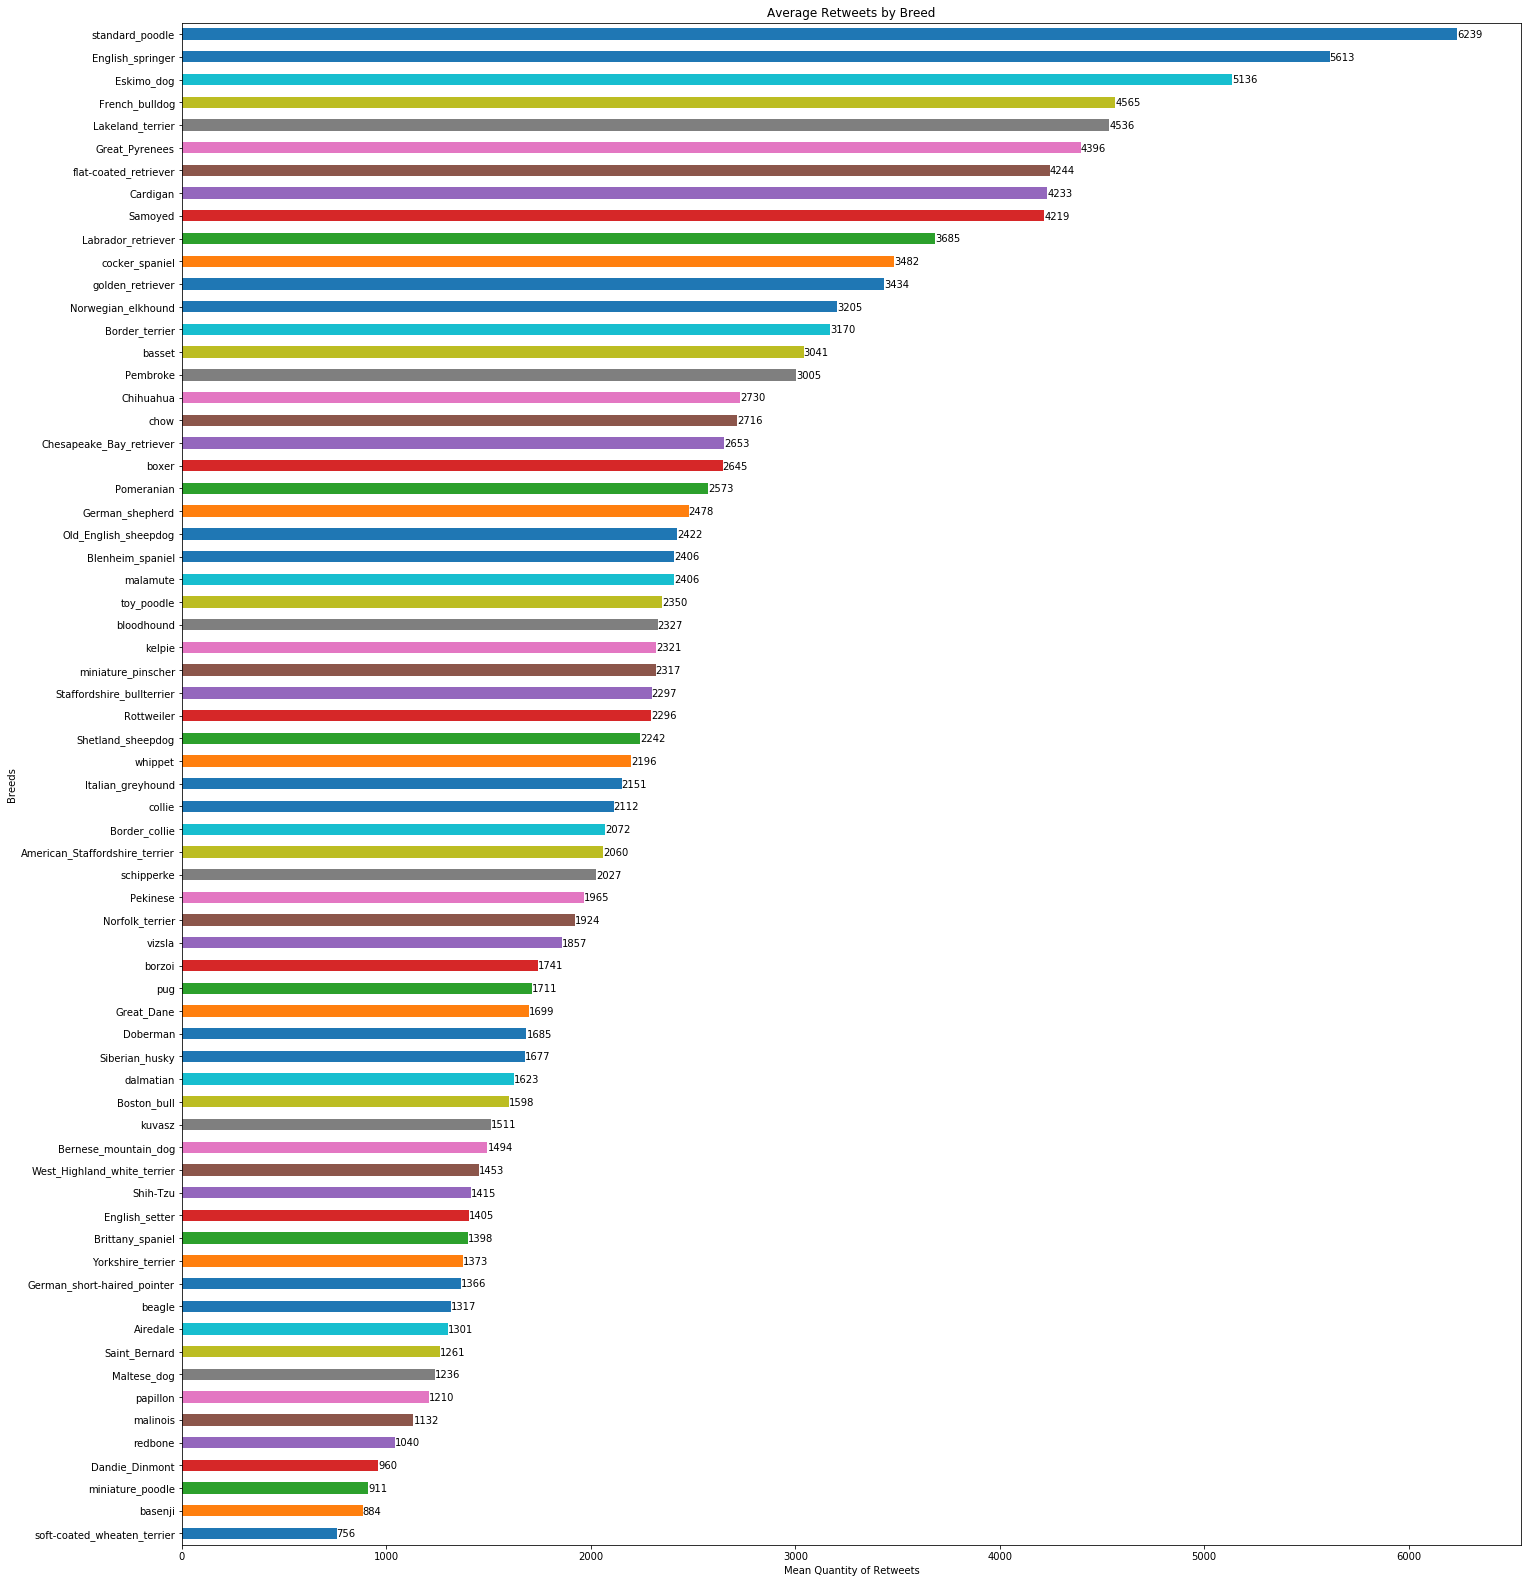

In [73]:
breed_retweet_threshold = df_master.groupby(['breed']).retweet_count.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_retweet_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_retweet_threshold):
    ax.annotate(round(count),(count + 0.01, breed - 0.15))
ax.set_title('Average Retweets by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Retweets');

Interestingly enough, by a significant margin, French Bulldogs get the most likes per tweet and Standard Poodles get the most retweets per tweet. Perhaps an insight here would be that to generate more likes and retweets, WeRateDogs would be better served tweeting according the highest retweets and likes per tweet, rather than just rating common breeds.

While the above insight has direct implications concerning the marketability of the WeRateDogs account, I do think it would just be fun to chart the ratings by breed since the data is available.

Given that that rating denominators are not always constant, I will create an additional *rating* column that holds the quotient of the rating values so that the ratings are comparable across all tweets. 

In [74]:
df_master.insert(loc = 6, column = "rating", value = df_master.rating_numerator/df_master.rating_denominator)
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,1.3,10,Tilly,0,0,0,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6079,32441
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,1.2,10,Archie,0,0,0,0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4023,24432
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,1.2,10,Franklin,0,0,0,0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9083,39297
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,1.3,10,None,0,0,0,0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3012,19766
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,1.3,10,Jax,0,0,0,0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1991,11551


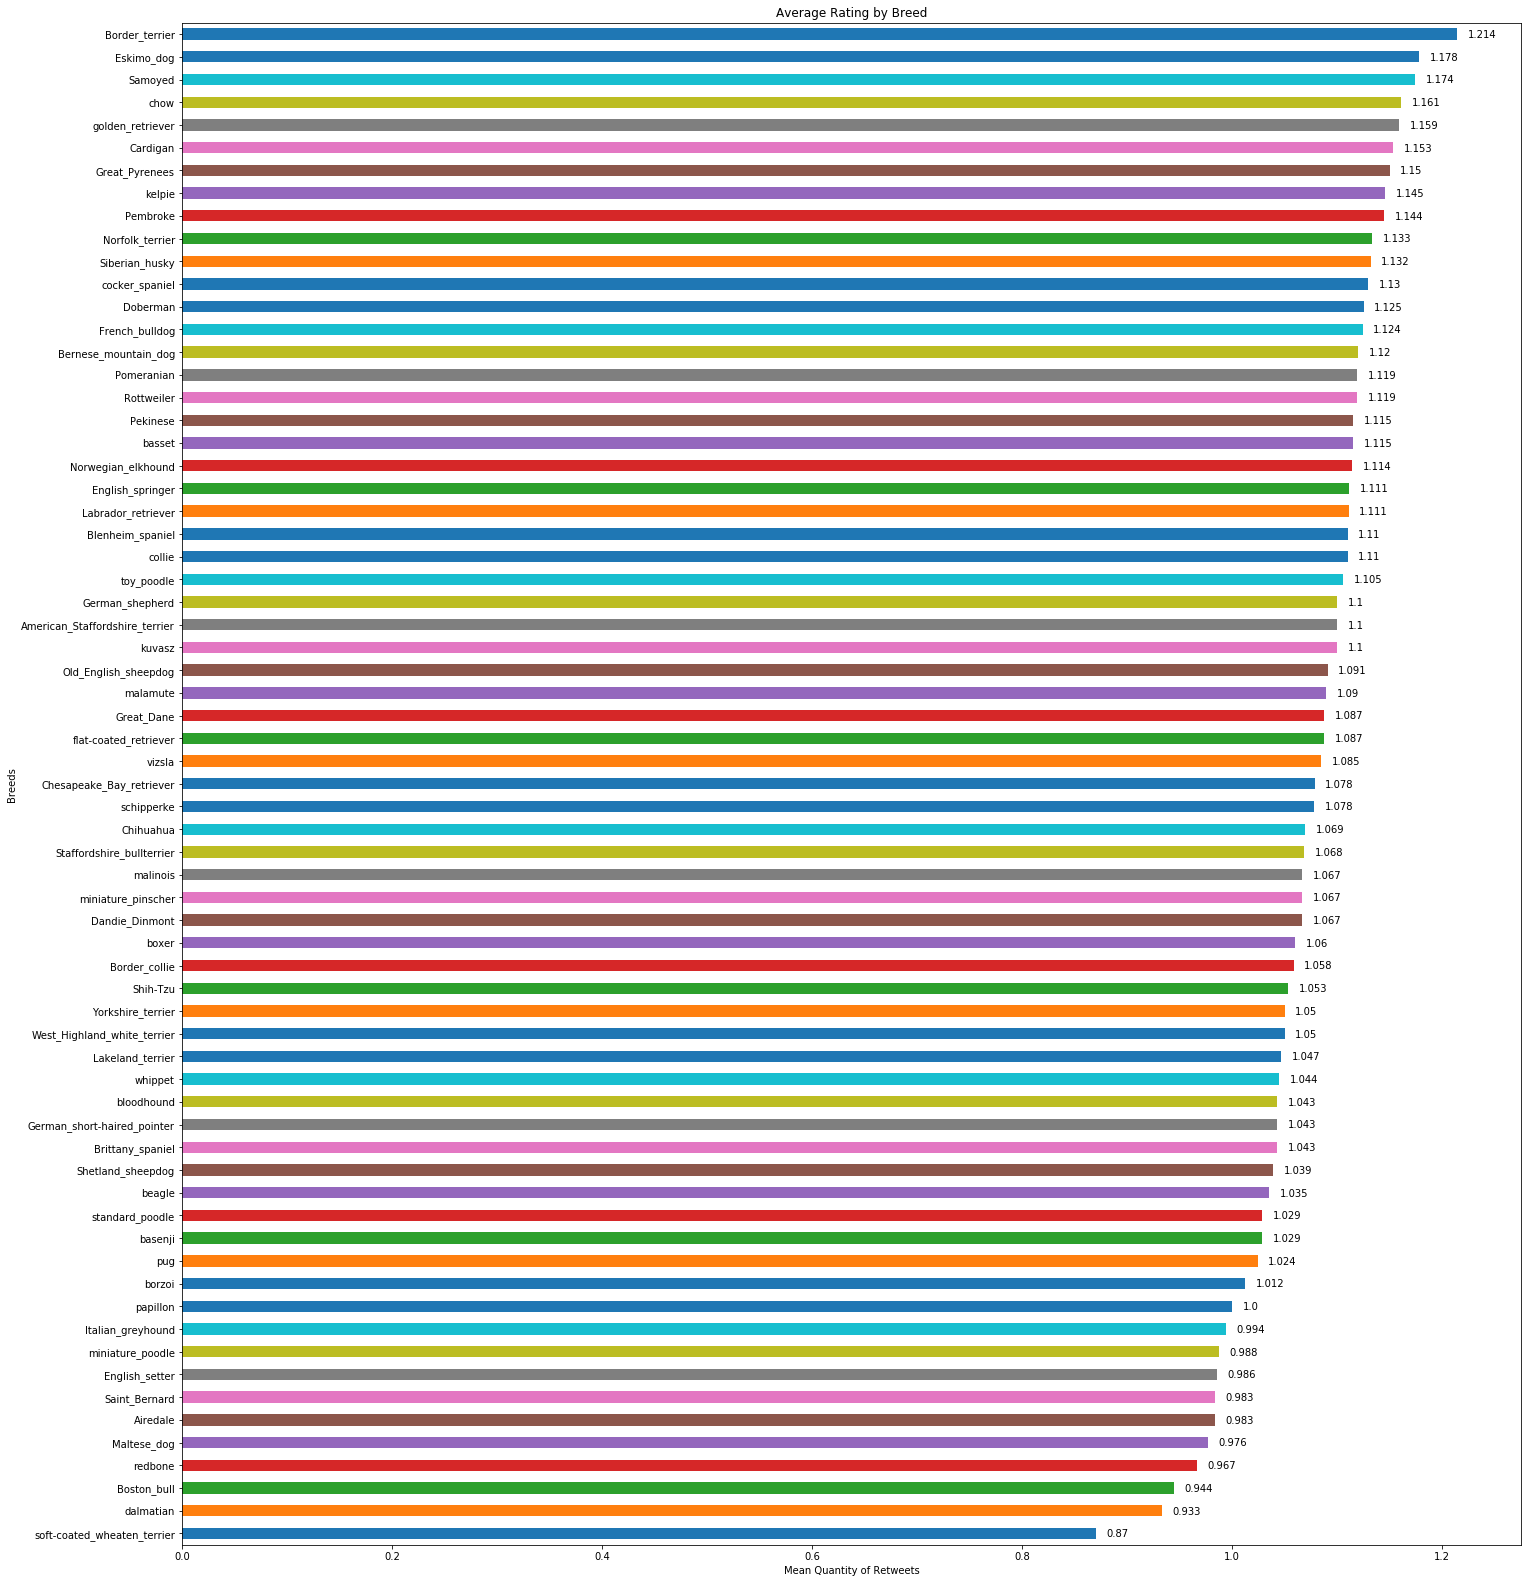

In [75]:
breed_rating_threshold = df_master.groupby(['breed']).rating.mean()[breed_counts_morethan5.index].sort_values()
ax = breed_rating_threshold.plot.barh(figsize = (24, 28));
for breed, count in enumerate(breed_rating_threshold):
    ax.annotate(round(count,3),(count + 0.01, breed - 0.15))
ax.set_title('Average Rating by Breed');
ax.set_ylabel('Breeds');
ax.set_xlabel('Mean Quantity of Retweets');

Surprisingly, the Border Terrier wins out here, even though the breed is not among the most commonly tweeted breeds. 

### Exploring Covariance

Since there are several continuous variables in the master dataframe, it would be useful to explore any correlations in the dataset. 

I will generate a heatmap of a covariance table to produce the correlation values and visualize the significance of the correlations. 

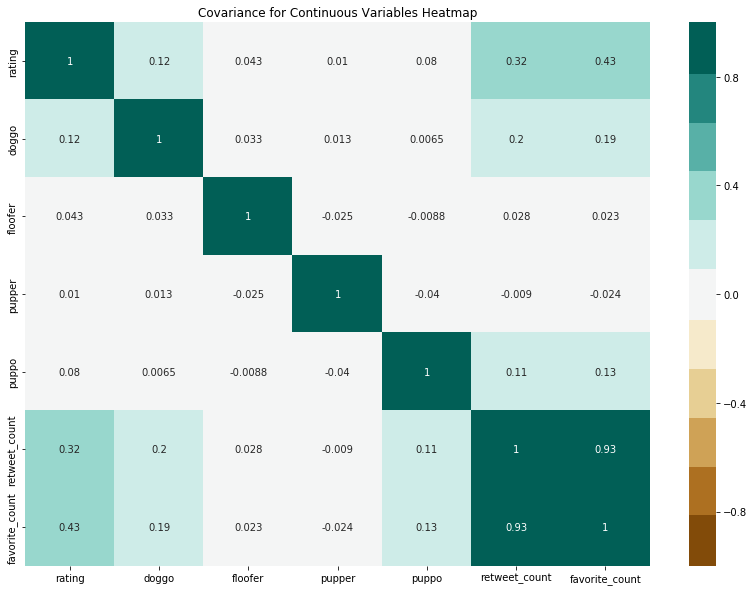

In [76]:
# heatmap for covariance among continuous variables
corr_table = df_master.loc[:,['rating', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count']].corr()
plt.pyplot.figure(figsize = (14,10))
plt.pyplot.title('Covariance for Continuous Variables Heatmap')
ax = sns.heatmap(corr_table, vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11));
plt.pyplot.yticks(va = 'center');

#ax.xaxis.set_tick_params(horizontalalignment='center')
#xtick_locations = np.arange(0,15,1);
#plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);

For the terms of endearment, it appears only **doggo** and **puppo** produced significant correlations, and the strongest correlation is between **doggo** and **retweet** with a correlation of 0.2, which might not be considered a strong correlation, but maybe it won't hurt to use "doggo" and "puppo" more often (or rate more pictures of "doggos" and "puppos"?; I'm not sure what these words mean). 

Interestingly, there do appear to be significant correlations between the *seemingly* arbitrary ratings and likes and retweets. 

I will plot these relations to see visually inspect these correlations. 

For 2D plots of ratings and likes/retweets, I will use a scatter plot with jitter. I will apply a jitter since ratings are almost practically discrete. The jitter will help with effectively visualizing the quantity of values at or near a particular coordinate. 

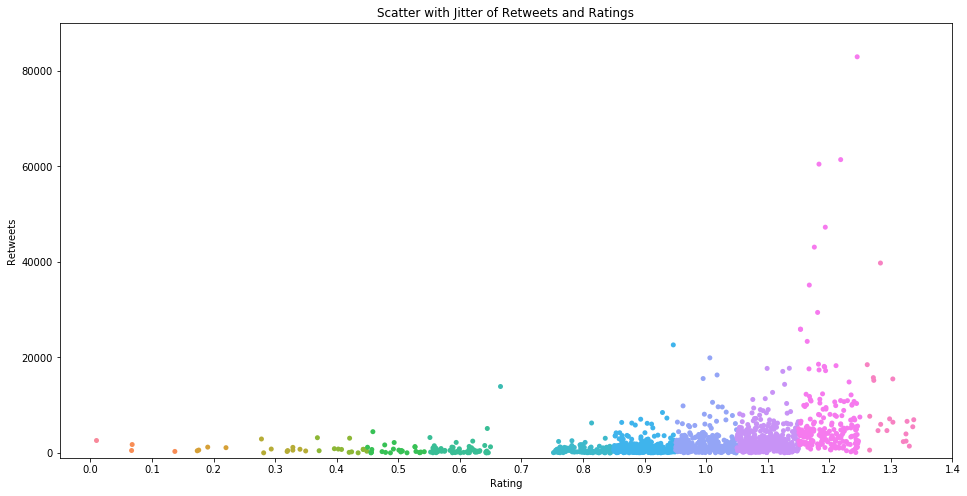

In [77]:
import numpy as np

plt.pyplot.figure(figsize = (16,8))
# adding jitter given ratings almost look discrete; using stipplot() for jitter
ax = sns.stripplot(x = df_master.rating, y = df_master.retweet_count, jitter = 0.5);
# manually specifying ticks at 0.1 increments rather than ticking at exact rating values
xtick_locations = np.arange(0,15,1);
plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);
# strange behavior with y-axis limits; manually specifying limits
plt.pyplot.ylim(-1000, 90000);

ax.set_title('Scatter with Jitter of Retweets and Ratings');
ax.set_ylabel('Retweets');
ax.set_xlabel('Rating');

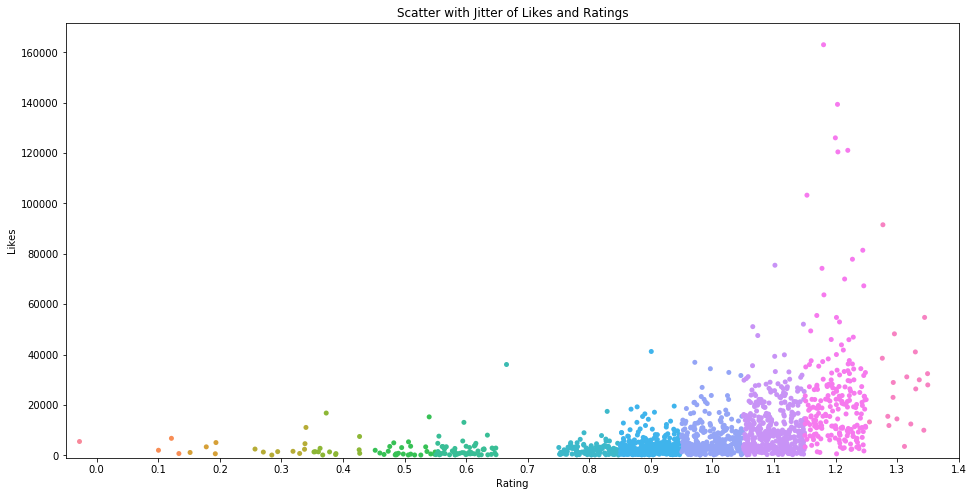

In [78]:
plt.pyplot.figure(figsize = (16,8))
# adding jitter given ratings almost look discrete; using stipplot() for jitter
ax = sns.stripplot(x = df_master.rating, y = df_master.favorite_count, jitter = 0.5);
# manually specifying ticks at 0.1 increments rather than ticking at exact rating values
xtick_locations = np.arange(0,15,1);
plt.pyplot.xticks(xtick_locations, [str(loc/10) for loc in xtick_locations]);
# strange behavior with y-axis limits; manually specifying
plt.pyplot.ylim(-1000);

ax.set_title('Scatter with Jitter of Likes and Ratings');
ax.set_ylabel('Likes');
ax.set_xlabel('Rating');

There does appear to be a positive relationship between the ratings and the popularity of the tweets. So maybe WeRateDogs shouldn't expect low rated dogs to garner much publicity. 

## Conclusions

After wrangling the data from the different data sources, I was able to use data from each data source to produce the following insights: 

1. Although Golden Retrievers are by far the most common breed on WeRateDogs, there are other breeds that garner more likes and retweets. 
2. Whether a tweet has a "floofer" and "pupper" doesn't seem impact likes and retweets, but there is a slight positive correlation for "doggos" and "puppos". 
3. Higher ratings do appear to garner more likes and retweets. 

So maybe for the next rating, WeRateDogs should seek a very good French Bulldog and award the "doggo" a 14/10. 